In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import namedtuple

import matplotlib.pyplot as plt 
import cv2 
import json
import numpy as np

import ritnet
import nia22
from glob import glob

from matplotlib.patches import Ellipse
from nia22.eyes import Info

1. 라벨의 좌 우 끝이 평행이 되도록 자르기
2. RITnet에 맞는 적절한 크기로 (상하좌우 dx * 2 정도?) 
3. 640 * 400으로 resize
4. 눈 한 쪽씩 / 두눈 다 

In [21]:
ddir = "/home/di/Work/data1/NIA2022/ORG/"
vid_dir_base = "/mnt/syn2422/raw/raw/by_id/"

uid = "009"

pattern = ddir + f"{date}/*.json"

json_list = glob(pattern)
json_list.sort()
print(f"{len(json_list)} JSON files are found")

12862 JSON files are found


In [17]:
fn_json = json_list[0]

In [18]:
# Parse file name

file = Info(fn_json) 

[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S01_L_rgb_A_C_T.mp4 is missing!


In [22]:
file.vid_dir = vid_dir_base + f"{file.id}/T1/{file.device_d}/RGB/"

In [27]:
fn_vid = file.vid_dir + file.fn_vid

In [28]:
cap = cv2.VideoCapture(fn_vid)
#nframes = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [36]:
cap.isOpened()

True

프레임 맞추기 

In [19]:
# 1. load annotation
anno = json.load(open(file.fn_full,"r"))

In [54]:
dd = anno['Annotations']['annotations']

In [31]:
eye = nia22.eyes.Eye(anno["Annotations"]["annotations"])

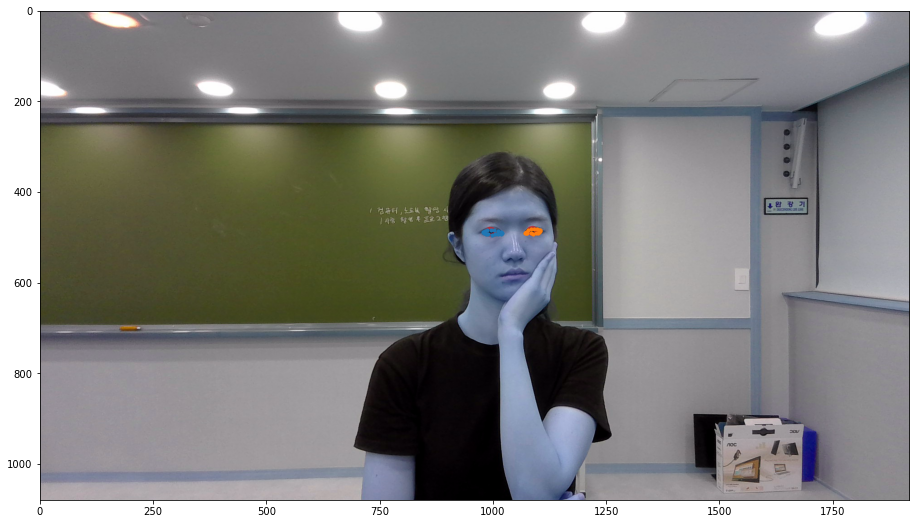

In [53]:
# 2. load image
cap.set(cv2.CAP_PROP_POS_FRAMES, file.frames[0])
ok, frame = cap.read()
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


plt.close("all")
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
fig.set_size_inches(16,9)

# 피사체의 왼쪽 눈
iris = eye.l_iris
xc, yc = iris['cx'], iris['cy']
ra = iris['rx']
rb = iris['ry']
angle = iris['rotate']

ellipse1 = Ellipse((xc, yc), 2*ra,2*rb, angle=angle, alpha=0.5,
                  facecolor='none', edgecolor="red", lw=3)
ax.add_artist(ellipse1)

# 공막
p_left_eye = np.array(eye.l_eyelid['points'])
plt.scatter(p_left_eyes[:,0], p_left_eyes[:,1], s=10)


#피사체의 오른쪽 눈
iris = eye.r_iris
xc, yc = iris['cx'], iris['cy']
ra = iris['rx']
rb = iris['ry']
angle = iris['rotate']

ellipse2 = Ellipse((xc, yc), 2*ra,2*rb, angle=angle, alpha=0.5,
                  facecolor='none', edgecolor="red", lw=3)
ax.add_artist(ellipse2)

p_right_eye = np.array(eye.r_eyelid['points'])
plt.scatter(p_right_eyes[:,0], p_right_eyes[:,1], s=10)


ax.imshow(frame)


plt.show()

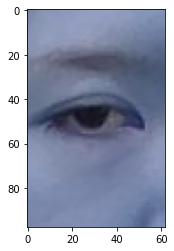

In [54]:
area, cropped = nia22.eyes.crop_eye(frame, p_left_eye)


plt.imshow(cropped)

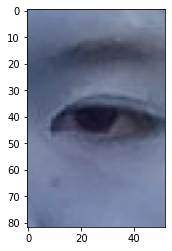

In [55]:
area, cropped = nia22.eyes.crop_eye(frame, p_right_eye)


plt.imshow(cropped)

In [59]:
import os
from nia22.eyes import mask_one_eye, crop_eye

In [78]:
fn = "_"

#img = cv2.imread(fn_png)
#anno = json.load(open(fn_json))
# temporary version
eye = nia22.eyes.Eye(anno["Annotations"]['annotations'])
# Final version
#eye = nia22.eyes.Eye(anno["Annotations"]["image"]["annotations"])
cropped, mask = mask_one_eye(img, eye, "r")
cv2.imwrite(png_dir+fn+"r.png", cropped)
np.save(label_dir+fn+"r.npy",mask)

#keep.append([cropped, mask])

cropped, mask = mask_one_eye(img, eye, "l")
cv2.imwrite(png_dir+fn+"l.png", cropped)
np.save(label_dir+fn+"l.npy" ,mask)


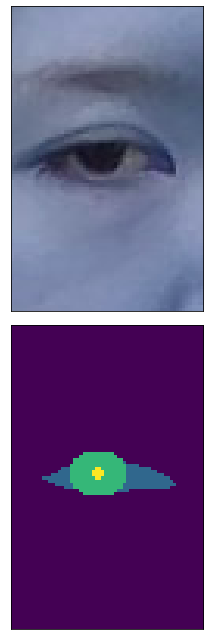

In [79]:
fig,axs = plt.subplots(2)
fig.set_size_inches(12,9)

cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
axs[0].imshow(cropped)
axs[1].imshow(mask)
    
for ax in axs.ravel():
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.savefig("test.png", bbox_inches='tight')

In [4]:
# 3. (optional) rotate image 

In [ ]:
# 5. keep track of rotation and transplation info.